In [39]:
 import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as py


In [40]:
covid_file = "../CSV/covid_us_county.csv"
population_file="../CSV/US_population.csv"

covid_df = pd.read_csv(covid_file)

population_df=pd.read_csv(population_file)

covid_df

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0
...,...,...,...,...,...,...,...,...,...
1834753,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-18,664,WY,6
1834754,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-19,665,WY,6
1834755,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-21,669,WY,6
1834756,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-22,670,WY,6


In [41]:
case = covid_df.groupby(["state"]).max()["cases"]
mean_state=covid_df.groupby(["state"]).mean()["cases"]

covid_by_state=pd.DataFrame({"Cases":case,
                             "Mean" :mean_state}).reset_index()

                             
covid_by_state                                

,state,Cases,Mean
0,Alabama,83039,3587.029276
1,Alaska,32413,874.319037
2,American Samoa,0,0.000000
3,Arizona,573082,23094.614915
4,Arkansas,44983,2001.059092
5,California,1276254,27537.130389
6,Colorado,75412,3331.617100
7,Connecticut,101119,14530.079781
8,Delaware,65530,8946.099818
9,Diamond Princess,49,44.080146


In [68]:
merge_df = pd.merge(covid_by_state , population_df, on="state")

merge_df["Infection Rate"]=(merge_df["Cases"]/merge_df["Population"]*100)

merge_df
merge_df.to_csv(../CSV/Infection_rate.csv )


SyntaxError: invalid syntax (<ipython-input-68-c2e6e13946f0>, line 6)

<Figure size 2160x1440 with 0 Axes>

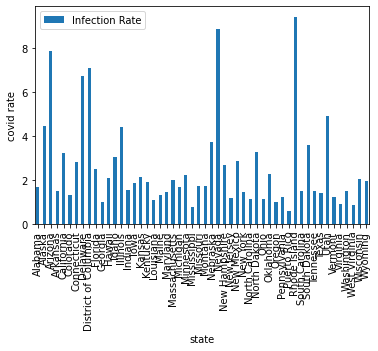

In [62]:
plt.figure(figsize=(30,20))
merge_df.plot(x="state", y="Infection Rate" ,kind="bar",)
plt.xlabel('state')
plt.ylabel('covid rate')
plt.show()


In [66]:
Ten_top=pd.DataFrame(merge_df.nlargest(10, ['Cases']))
Ten_top


,state,Cases,Mean,Population,Infection Rate
4,California,1276254,27537.130389,39512223,3.230023
2,Arizona,573082,23094.614915,7278717,7.873393
13,Illinois,561168,5948.135526,12671821,4.428472
9,Florida,533821,14784.461551,21477737,2.485462
44,Texas,411554,5101.147143,28995881,1.419353
32,New York,284750,14159.623577,19453561,1.463742
28,Nevada,273860,7710.845844,3080156,8.891108
22,Michigan,167250,4351.098800,9986857,1.674701
45,Utah,157373,4818.873037,3205958,4.908767
38,Pennsylvania,155859,6878.735593,12801989,1.217459


<Figure size 1440x2880 with 0 Axes>

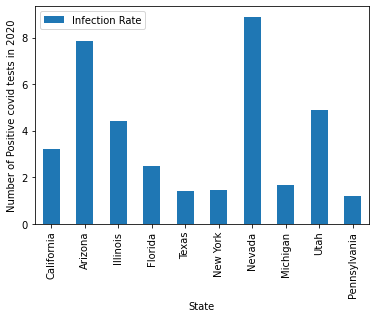

In [67]:
plt.figure (figsize=(20,40))
Ten_top.plot(x="state", y="Infection Rate" ,kind="bar",)
plt.xlabel('State')
plt.ylabel('Number of Positive covid tests in 2020')
plt.show()